In [0]:
from google.colab import files


In [0]:
uploaded = files.upload()

Saving titanic_train.csv to titanic_train (1).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.read_csv('titanic_train.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.tail()

NameError: ignored

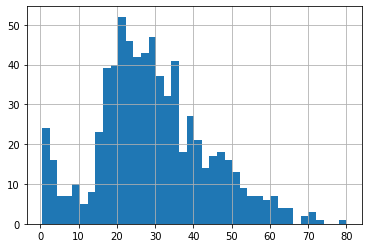

In [0]:
train['Age'].hist(bins=40)

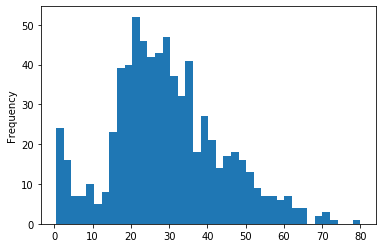

In [0]:
train['Age'].plot.hist(bins=40)

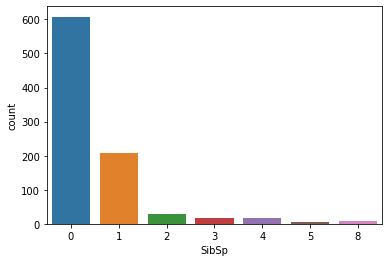

In [0]:
sns.countplot(x='SibSp',data=train)
# Many people didnt really have a spouse or sibling

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


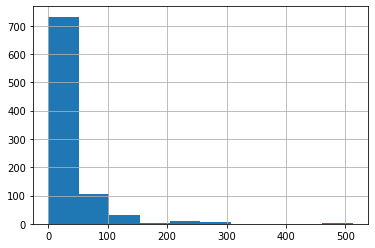

In [0]:
train["Fare"].hist()

In [0]:
import cufflinks as cf

In [0]:
cf.go_offline()

In [0]:
train['Fare'].iplot(kind='hist',bins=40)

In [0]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

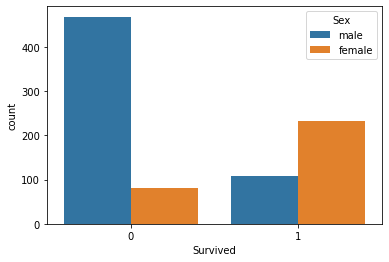

In [0]:
sns.countplot(x='Survived',hue='Sex',data=train)
# Male in the die group....mostly female in the survival group

In [0]:
# REPLACING THE MISSING AGE VALUES WITH THE MEAN AGE OF THE VALUES IN THE COLUMN TO FILL IN THE VALUES INSTEAD OF DROPPING THE COLUMN

In [0]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

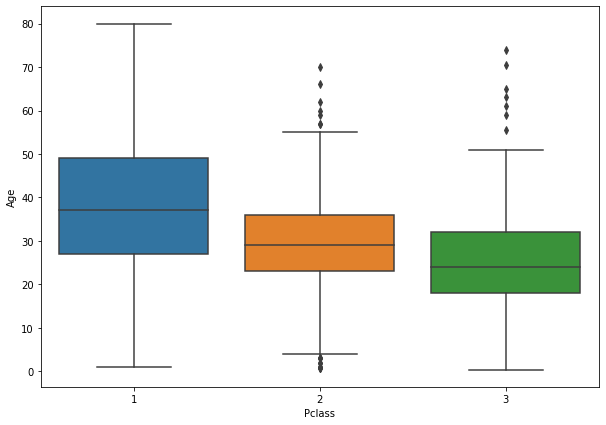

In [0]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

# The passengers in 1st and 2nd class appear to be older as compared to the passengers in the 3rd class

In [0]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [0]:
train["Age"]=train[['Age','Pclass']].apply(impute_age,axis=1)


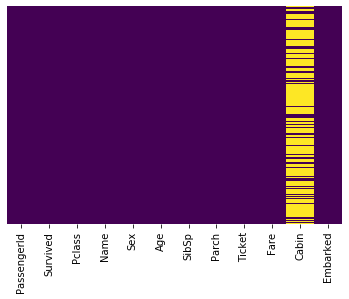

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
train.drop('Cabin',axis=1, inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
train.dropna(inplace=True)

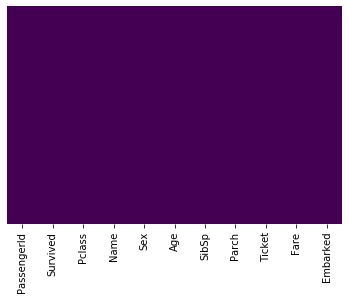

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
# CONVERT CATEGORICAL FEATURES TO SOMETHING WHICH IS MORE UNDERSTANDABLE BY THE MACHINE LEARNING ALGROTITHMS

# THUS, CREATING A DUMMY VARIABLE

# FOR SEX, EMBARKED COLUMN======INDICATING A 0 OR 1 VALUE 

In [0]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [0]:
# to have only one column perfectly predicting the male or female / embarkd states...drop first is used
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
# NOW, ADD THESE NEW COLUMNS TO OUR DATAFRAMES in the form of list

train = pd.concat([train,sex,embark],axis=1)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [0]:
train.drop(['Sex','Embarked','Ticket','Name'],axis=1, inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [0]:
# Drop because it is index...
# train.drop('PassengerId',inplace=True,axis=1)

In [0]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [0]:
X = train.drop('Survived',axis=1)
y = train["Survived"]

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=101 )

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()

In [0]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [0]:
# from sklearn.metrics import confusion_matirx

In [0]:
# confusion_matrix(y_test, predictions)

In [0]:
# !pip install git+http://github.com/scikit-learn/scikit-learn.git

